Q1 Implement K-means algorithm from scratch without using any inbuilt library where you have object for K-means for eg. sklern

Import the necessary library and dataset, This will carry  1 Mark

In [14]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans,MiniBatchKMeans
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import distance
 

In [15]:
df=pd.read_csv('faithful.csv')

In [16]:
df.drop(df.columns[[0 ]], axis=1,inplace =True)
df.dropna(axis=0,how ='any',inplace =True)

Create a Plot by naming it Old Faithful Data Scatterplot. This will carry 2 Marks



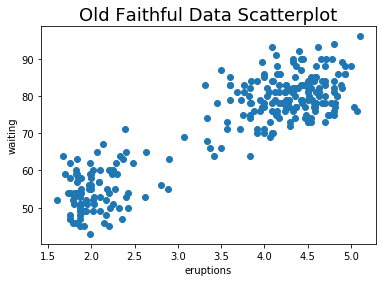

In [17]:
plt.scatter(df['eruptions'],df['waiting'])
plt.title("Old Faithful Data Scatterplot",fontdict={'fontsize': 18, 'fontweight': 'medium'})
plt.xlabel('eruptions')
plt.ylabel('waiting')

plt.savefig("2018AIML552_Old_Faithful_Data_Scatterplot") 

Implement K-Means and show the output visually 7 Marks 



In [5]:
#Remove the index column and convert it to numpy nd array
X=df.to_numpy()

In [6]:
##Global Parameters
minK=1
maxK=21
findOptimalK=True

In [7]:
## Class with KAlgoParams
class KAlgoParams : 
    ##initializer
    def __init__(self, k,X,J=1000000000, max_iter=500):
        self.K=k
        self.J=J
        self.X=X
        self.max_iter=max_iter
        self.clusterMeans =[]
        self.label_ =[]
        self.Mean={}
        self.indices = np.random.choice(self.X.shape[0], self.K, replace=False)
        self.clusterMeans=[]
        for loopEle in self.indices : 
            self.clusterMeans.append(X[loopEle])
            
    ## To Sring method        
    def toString(self):
        print("K",self.K,"J",self.J,"clusterMeans",self.clusterMeans,"Class Label ",self.label_)
    
    
    ## E Step 
    # Objective : Find the Rnk , Find the J value
    def __findRnk(self):

        ## Initalize the Rnk Array with Zero values
        Rnk =np.zeros((self.X.shape[0],self.K), dtype=np.int)
        index =0
        ## For each element find the distance from uArray elements. 
        ##         And set the index =1 for which distance is minimal from u
        for x in X : 
            x_mean_dist_arr=[]  
            for u in self.clusterMeans : 
                try : 
                    dst = distance.euclidean(x, u)
                    x_mean_dist_arr.append(dst)
                except Exception as e : 
                    print(e)
                    ##print(self.clusterMeans,x)
            Rnk[index][x_mean_dist_arr.index(min(x_mean_dist_arr)) ]=1 ## Assign 1 for u array index , which have min dist from X
            self.J = self.J + min(x_mean_dist_arr)
            index =index+1
        return Rnk
    
    
    ## M Step
    # Find Mean Points 
    def __findClusterCenter(self,iterationNo):
        mean_pts=[]
        for i in range(self.K) :
            rnk= self.Rnk[:,i]
            
            # IF no element exist in column then reinitialize with previous values
            if np.sum(rnk) >0 : 
                output = (rnk.dot(X))/np.sum(rnk)
            else : 
                ##output = (rnk.dot(X))/np.sum(rnk)
                print("For  K = "+ str(self.K) +"@ IterationNo :  "+str(iterationNo)+"    "+str(i)+ "th cluster point does not contain any dataset. So keeping new cluster point to old one")
                output=self.clusterMeans[i] ## 
            mean_pts.append(output)
        return mean_pts

    ## Find the Optimal J 
    def findOptimalJ(self):
        for i in range(500):
            J_beforeLoop=self.J
            self.J =0
            rnk = self.__findRnk()
            if abs(self.J-J_beforeLoop) <1 : 
                return
            self.Rnk=rnk
            self.clusterMeans= self.__findClusterCenter(i)
            self.Mean[i]=self.clusterMeans
            self.label_ =[]
            for i in range(self.Rnk.shape[0]):
                self.label_.append(np.argmax(self.Rnk[i]))
        return
    


In [8]:
KVsObject ={}
if findOptimalK :
    ## Find Optimal K 
    J_Array =[]
    for k in range(minK,maxK) : 
        param=KAlgoParams(k,X)
        param.findOptimalJ() 
        J_Array.append(param.J)
        KVsObject[k]=param

For  K = 18@ IterationNo :  0    14th cluster point does not contain any dataset. So keeping new cluster point to old one


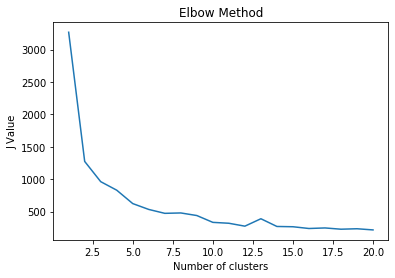

In [9]:

if findOptimalK : 
    ## Plot the J vs Cluster 
    plt.plot(range(minK,maxK), J_Array)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('J Value')
    plt.show()

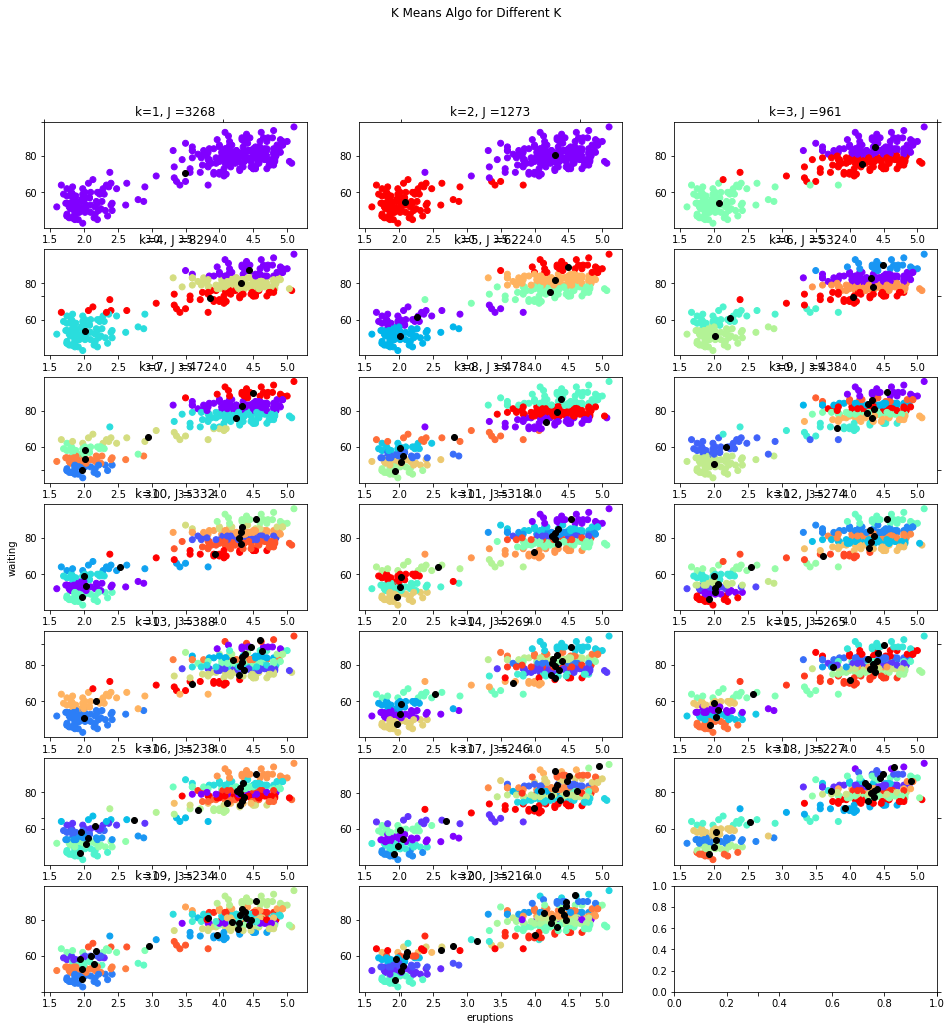

In [10]:
## Scatter plot for each K 
maxCol =3
maxRow =int((maxK-1)/maxCol)
if (maxK-1)%maxCol !=0 : 
    maxRow =maxRow+1
fig, axs = plt.subplots(maxRow,maxCol,figsize=(16,16))
fig.suptitle('K Means Algo for Different K',fontdict={'fontsize': 18, 'fontweight': 'medium'})

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False) 
plt.xlabel('eruptions')
plt.ylabel('waiting')

i=0
j =0
for k in  range(minK,maxK):
    KObject =KVsObject[k] 
    axs[i,j].scatter(df['eruptions'],df['waiting'], c=KObject.label_, cmap='rainbow')
    axs[i,j].scatter(np.array(KObject.clusterMeans)[:,0],np.array(KObject.clusterMeans)[:,1] , color='black')
    axs[i,j].title.set_text("k="+str(k)+", J ="+str(int(KObject.J) ))
    j=j+1
    if(j%maxCol==0):
        j=0
        i=i+1

Text(0, 0.5, 'waiting')

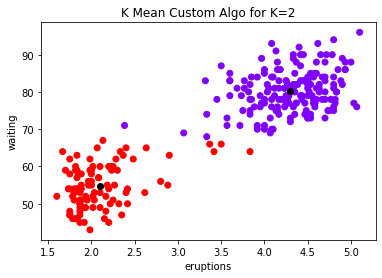

In [11]:
## Do the K Mean Analysis with K =2 as visualize wise 2 look well clustering
k=2
KObject=KAlgoParams(k,X)
KObject.findOptimalJ() 
plt.scatter(X[:,0],X[:,1], c=KObject.label_, cmap='rainbow')
plt.scatter(np.array(KObject.clusterMeans)[:,0],np.array(KObject.clusterMeans)[:,1] , color='black')
plt.title('K Mean Custom Algo for K=2')
plt.xlabel('eruptions')
plt.ylabel('waiting')    

Q2 To do : Implement K-means using Sklearn 1 Mark

Text(0, 0.5, 'waiting')

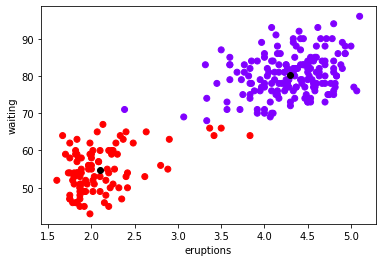

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('eruptions')
plt.ylabel('waiting')

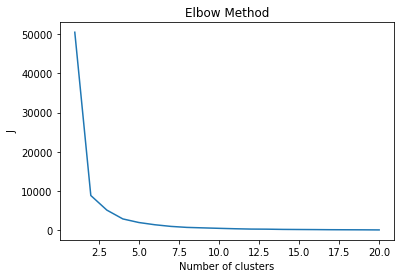

In [13]:
wcss = []
for i in range(minK,maxK):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(minK,maxK), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('J')
plt.show()